In [1]:
%pylab inline
from astropy import units
from astropy import constants
from cosmotools import rvir, rvir2
from profiles import *
import os.path
#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)
#sns.set(style='ticks', context='talk', font_scale=2)

In [3]:
# Constants
h = 0.7
H =  H = 3.2407789E-18  / units.s * 0.7
print G, H

4.51835939627e-39 kpc3 / (s2 solMass) 2.26854523e-18 1 / s


# LMC model 

## LMC: Plummer profile

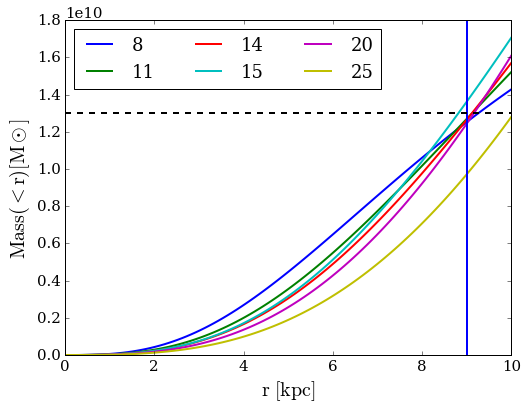

In [8]:
MLMC = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
LMC_c = [8, 11, 14, 15, 20, 25]
x_LMC_inner = linspace(0, 10, 100)
x_LMC_outter = linspace(0, 50, 100)

Mass_LMC_in = zeros([6, 100])
Mass_LMC_out = zeros([6, 100])
Mass_LMC_pin = zeros([6, 100])
Mass_LMC_pout = zeros([6, 100])

figure(figsize=(8, 6))
for i in range(6):
    Mass_LMC_pin[i,:] = mass_plummer(LMC_c[i], x_LMC_inner, MLMC[i])
    Mass_LMC_pout[i,:] = mass_plummer(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, Mass_LMC_pin[i, :], label=str(LMC_c[i]), lw=2)

axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_plummer.png', bbox_inches='tight')

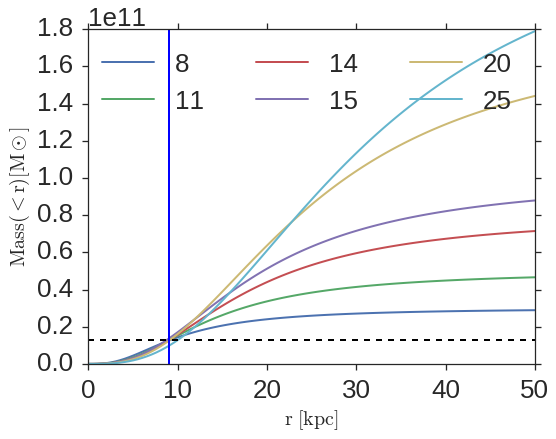

In [13]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, Mass_LMC_pout[i, :], lw=2, label=str(LMC_c[i]))

axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_plummer_out.png', bbox_inches='tight')

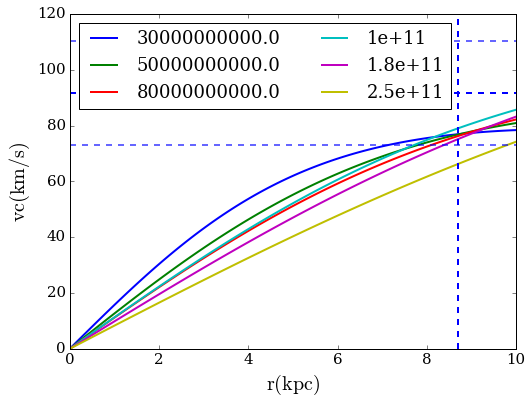

In [12]:
vc_LMC_pin = np.zeros([6, 100])
vc_LMC_pout = np.zeros([6, 100])
figure(figsize=(8, 6))

for i in range(6):
    vc_LMC_pin[i,:] = vc_plummer(LMC_c[i], x_LMC_inner, MLMC[i])
    vc_LMC_pout[i,:] = vc_plummer(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, vc_LMC_pin[i, :], label=str(MLMC[i]), lw=2)

vc_obs = 91.7 
    
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
legend(loc='best', ncol=2)
axvline(8.7, lw=2, ls='--')

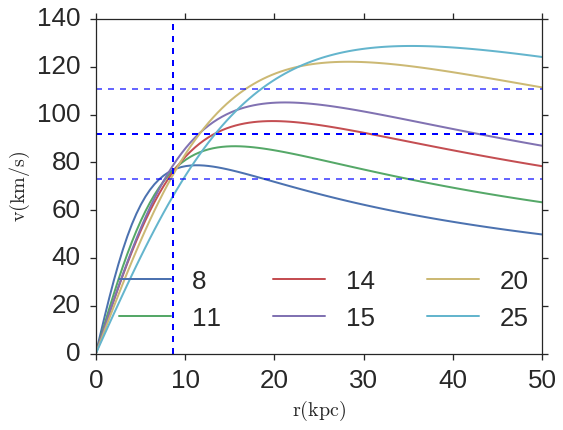

In [15]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, vc_LMC_pout[i, :], label=str(LMC_c[i]), lw=2)
axvline(8.7, lw=2, ls='--')
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{v(km/s)}$', fontsize=20)
legend(loc='best', ncol=3)
savefig('../doc/LMC_rotcurve_plummer.png', bbox_inches='tight')

# From cosmological simulations the concentration parameters for the previous Masses for the LMC let to the following rotation curves

### The concentration paramater for a NFW halo is:

In [4]:
def halo_c(M):# from http://adsabs.harvard.edu/abs/2011ApJ...740..102K eq.11
    h = 0.7
    C = 9.60 * (M * h/ 1E12)**(-0.075)
    return C

In [5]:
LMC_c_c1 = halo_c(3E10) # concentration paramter from cosmological simulations http://adsabs.harvard.edu/abs/2011ApJ...740..102K
LMC_c_c2 = halo_c(5E10)
LMC_c_c3 = halo_c(8E10)
LMC_c_c4 = halo_c(1E11)
LMC_c_c5 = halo_c(1.8E11)
LMC_c_c6 = halo_c(2.5E11)

print LMC_c_c1, LMC_c_c2, LMC_c_c3, LMC_c_c4, LMC_c_c5, LMC_c_c6

12.8264001882 12.3442903926 11.9167308634 11.718954823 11.2135582183 10.9406564127


In [6]:
## Finding a/rs ratio from Van Der MArel et al 2012 Apendix

In [9]:
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f

def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c))
    return x

def mhmvir(ar, cvir):
    x = ar**2 / (2.0*fx(cvir))
    return x

MLMC_hern = np.zeros(6)
RvirLMC = np.zeros(6)
aLMC = np.zeros(6)
LMCc = np.zeros(6)
vcLMC_c = np.zeros([6, len(x_LMC_inner)])
LMC_eM = np.zeros([6, len(x_LMC_inner)])


for i in range(0, 6):
    LMCc[i] = halo_c(MLMC[i])
    RvirLMC[i] = rvir(MLMC[i], 0).value
    aLMC[i] = ars(LMCc[i]) * (rvir(MLMC[i], 0).value / LMCc[i])
    MLMC_hern = mhmvir(ars(LMCc[i]), LMCc) * MLMC[i]
    vcLMC_c[i, :] = vc_hernquist(aLMC[i], x_LMC_inner,  0, 0, MLMC_hern[i])
    LMC_eM[i, :] = mass_hernquist(aLMC[i], x_LMC_inner, MLMC_hern[i])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


In [10]:
print "LMC conncentration paramter = ", LMCc
print "LMC Virial Radius", RvirLMC
print "LMC hernquist scale length", aLMC

LMC conncentration paramter =  [ 12.82640019  12.34429039  11.91673086  11.71895482  11.21355822
  10.94065641]
LMC Virial Radius [  81.58441562   96.72902056  113.13494877  121.87092914  148.24872168
  165.4042985 ]
LMC hernquist scale length [ 13.69248998  16.78581868  20.24580444  22.129845    27.97510588
  31.89068986]


### - Computing the circular velocity for a Hernquist profile

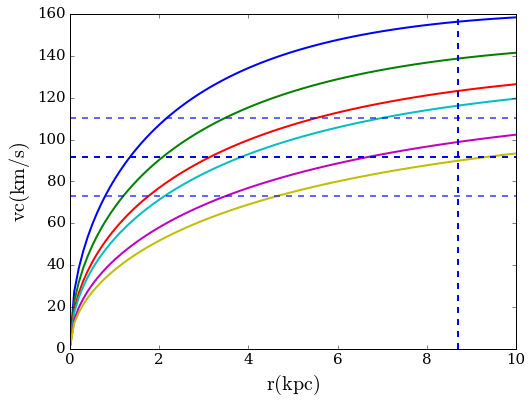

In [13]:
figure(figsize=(8, 6))

for i in range(0, 6):
    vcLMC_c[i, :] = vc_hernquist(aLMC[i], x_LMC_inner,  0, 0, MLMC_hern[i])
    plot(x_LMC_inner, vcLMC_c[i, :], lw=2)
    
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')

### - enclosed Mass

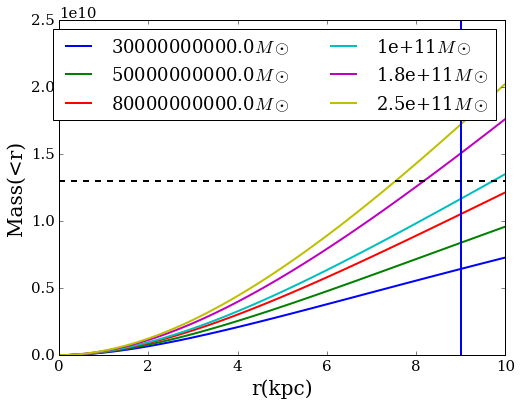

In [14]:
figure(figsize=(8, 6))

for i in range(0, 6):
    plot(x_LMC_inner, LMC_eM[i, :], lw=2, label=str(MLMC[i])+"$M\odot$") 
legend(loc='best', ncol=2)
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('r(kpc)', fontsize=20)
ylabel('Mass(<r)', fontsize=20)

# Finding the Hernquist scale length:

In [15]:
LMC_dm_mass = 1.7E10 - 3.2E9
print LMC_dm_mass

13800000000.0


In [16]:
!python LMC_hernquist_a.py 3E10  1.38E10

4.49924962481


In [17]:
a1 = !python LMC_hernquist_a.py 3E10  1.38E10
a2 = !python LMC_hernquist_a.py 5E10  1.38E10
a3 = !python LMC_hernquist_a.py 8E10  1.38E10
a4 = !python LMC_hernquist_a.py 1E11  1.38E10
a5 = !python LMC_hernquist_a.py 1.8E11  1.38E10
a6 = !python LMC_hernquist_a.py 2.5E11  1.38E10

In [18]:
print a1, a2, a3, a4, a5, a6

['4.49924962481'] ['8.44172086043'] ['13.0690345173'] ['15.6603301651'] ['24.1005502751'] ['30.0050025013']


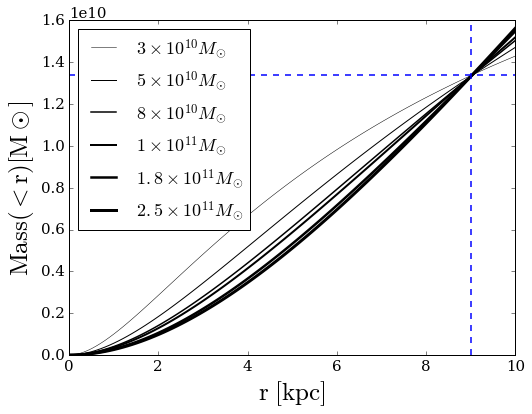

In [31]:
af_LMC = np.array([4.49, 8.44, 13.069, 15.660, 24.1005, 30.005])
LMC_Mf_in = np.zeros([6, 100])
LMC_Mf_out = np.zeros([6, 100])
LMC_rhof_in = np.zeros([6, 100])
LMC_rhof_out = np.zeros([6, 100])
vcLMC_f = np.zeros([6, 100])
Mass = [r'$3\times 10^{10}$', r'$5\times 10^{10}$', r'$8\times 10^{10}$', r'$1\times 10^{11}$', r'$1.8\times 10^{11}$', r'$2.5\times 10^{11}$']
figure(figsize=(8, 6))


for i in range(6):
    LMC_Mf_in[i,:] = mass_hernquist(af_LMC[i], x_LMC_inner, MLMC[i])
    LMC_Mf_out[i,:] = mass_hernquist(af_LMC[i], x_LMC_outter, MLMC[i])
    LMC_rhof_in[i,:] = dens_hernquist(af_LMC[i], x_LMC_inner, MLMC[i])
    LMC_rhof_out[i,:] = dens_hernquist(af_LMC[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, LMC_Mf_in[i,:], label=str(Mass[i]) + '$M_{\odot}$', lw=(i+1)*0.5, c='k')
    
    
axvline(9, lw=1.5, c='b', ls='--', alpha=1)
axhline(1.34E10, lw=1.5, ls='--', c='b', alpha=1)
legend(loc='best', ncol=1)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=25)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=25)
savefig('../doc/LMC_mass_hernquist.png', bbox_inches='tight', dpi=300)

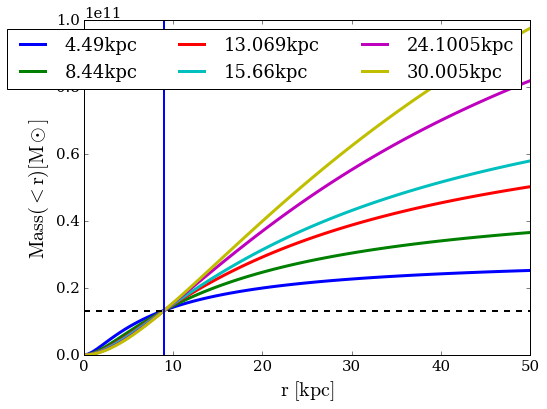

In [21]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, LMC_Mf_out[i,:], lw=3, label=str(af_LMC[i])+'kpc')

legend(loc='best', ncol=3)
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist_out.png', bbox_inches='tight')

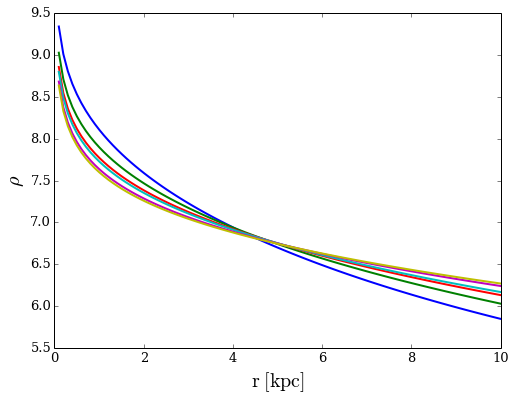

In [20]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_inner, log10(LMC_rhof_in[i,:]), lw=2, label=str(af_LMC[i]))
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel(r'$\mathrm{\rho}$', fontsize=20)

In [63]:
legend?

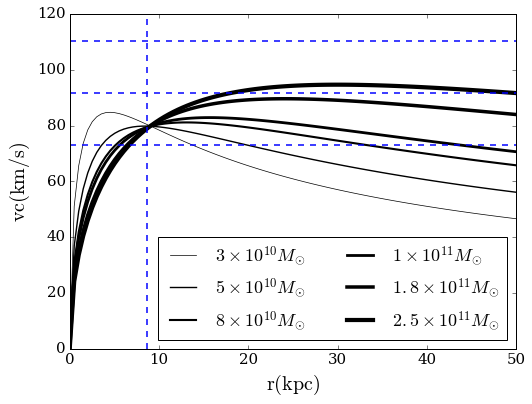

In [30]:
#x20 = np.linspace(0, 20, 100)
figure(figsize=(8, 6))
for i in range(6):
    vcLMC_f[i, :] = vc_hernquist(af_LMC[i], x_LMC_outter,  0, 0, MLMC[i])
    plot(x_LMC_outter, vcLMC_f[i,:], lw=(i+1)*0.7, label=Mass[i]+ '$M_{\odot}$', c='k')
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
legend(loc='best', ncol=2)
axhline(vc_obs, lw=1.5, ls='--', c='b', alpha=1)
axhline(vc_obs+18.8, lw=1.5, ls='--', c='b', alpha=1)
axhline(vc_obs-18.8, lw=1.5, ls='--', c='b', alpha=1)
axvline(8.7, lw=1.5, ls='--', c='b', alpha=1)
savefig('../doc/LMC_rotcurve_hernquist.png', bbox_inches='tight', dpi=300)

# printing the LMC IC for GalIC

In [39]:
def IC(M):
    vc = (M*units.Msun * (np.sqrt(48.6)*G*H))**(1.0/3.0)
    vc = vc.to(units.km / units.s)
    return vc

In [40]:
IC(MLMC[0])

<Quantity 39.786867410765474 km / s>

## GalIC models


In [41]:
path = '../ICs/LMC/'
LMC1 = loadtxt(path + "LMC1_rotcurve.txt", skiprows=1)
LMC2 = loadtxt(path + "LMC2_rotcurve.txt", skiprows=1)
LMC3 = loadtxt(path + "LMC3_rotcurve.txt", skiprows=1)
LMC4 = loadtxt(path + "LMC4_rotcurve.txt", skiprows=1)
LMC5 = loadtxt(path + "LMC5_rotcurve.txt", skiprows=1)
LMC6 = loadtxt(path + "LMC6_rotcurve.txt", skiprows=1)

R1 = LMC1[:,0]
R2 = LMC2[:,0]
R3 = LMC3[:,0]
R4 = LMC4[:,0]
R5 = LMC5[:,0]
R6 = LMC6[:,0]

vc_LMC1 = LMC1[:,1]
vc_LMC2 = LMC2[:,1]
vc_LMC3 = LMC3[:,1]
vc_LMC4 = LMC4[:,1]
vc_LMC5 = LMC5[:,1]
vc_LMC6 = LMC6[:,1]

(0, 50)

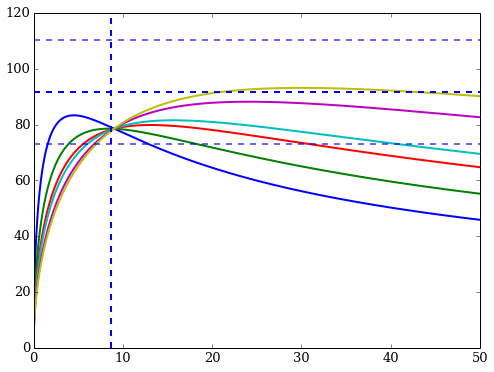

In [43]:
figure(figsize=(8, 6))

plot(R1/h, vc_LMC1, lw=2)
plot(R2/h, vc_LMC2, lw=2)
plot(R3/h, vc_LMC3, lw=2)
plot(R4/h, vc_LMC4, lw=2)
plot(R5/h, vc_LMC5, lw=2)
plot(R6/h, vc_LMC6, lw=2)

axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')
xlim(0, 50)

In [23]:
h = 0.7
Delta_vir = 360
Omega_m = 0.27

def method1(Mvir):
    Rvir = 206 / h * units.kpc * (Delta_vir * Omega_m / 97.2)**(-1.0/3.0) * (Mvir * h / (1E12 * units.Msun) )**(1.0/3.0)
    return Rvir.to(units.kpc)

def method2(Mvir):
    Rvir = (2*G / (H*0.7)**2)**(1/3.0) * (Mvir / (Delta_vir * Omega_m))**(1/3.0)
    return Rvir.to(units.kpc)

In [24]:
Mvir = 1E12 * units.Msun

In [25]:
print 'method 1 ', method1(Mvir)
print 'method 2 ', method2(Mvir)

method 1  261.29746337 kpc
method 2  339.98783287 kpc


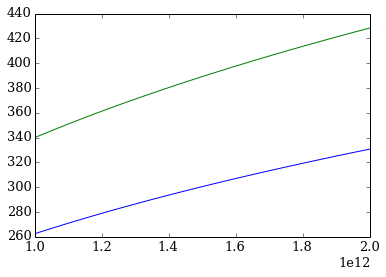

In [26]:
MM = linspace(1E12, 2E12, 100) * units.Msun
plot(MM, method1(MM)*1.0045)
plot(MM, method2(MM))

In [4]:
## Comparisons of Analytic orbits against N-body simulations

In [23]:
NB = loadtxt('CM/rgal_snaps.txt')
Rgal = NB[:,1]
t = NB[:,0]
index = where(t<=1.2)
AO_S = loadtxt('../../orbits/data/LMC_10E10_1E12_free_sat.txt')
AO_H = loadtxt('../../orbits/data/LMC_10E10_1E12_free_host.txt')
RgalAO = np.sqrt((AO_S[:,1] - AO_H[:,1])**2 + (AO_S[:,2] - AO_H[:,2])**2 + (AO_S[:,3] - AO_H[:,3])**2)
tAO = AO_S[:,0]
index2 = where(RgalAO<261)


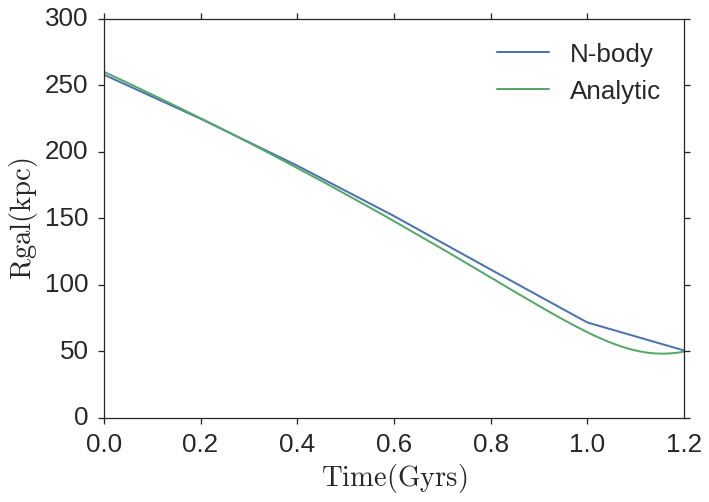

In [32]:
plot(t[index[0]], Rgal[index[0]], label='N-body', lw=2)
plot(tAO[index2[0]] + 1.2, RgalAO[index2], label = 'Analytic', lw=2)
legend()
xlim(0, 1.2)
xlabel('$\mathrm{Time(Gyrs)}$')
ylabel('$\mathrm{Rgal(kpc)}$')
savefig('LMC_orbit.png', bbox_inches='tight')